# Detecção de Face com Haar Cascade

**Objetivos da aula:**

*   Apresentar uma introdução sobre aprendizado de máquina
*   Apresentar e aplicar o Haar Cascade para detecção de face
*   Apresentar uma intuição do algoritmo de Viola Jones

**Como fazer a detecção de faces?**

O nosso objetivo hoje é compreender a essência de algoritmos para detecção facial. Esses algoritmos são utilizados para diversas aplicações, desde a lendária câmera Tekpix, passando por smartphones e o Google Fotos para classificação na organização de pastas por pessoas, por exemplo.

**Aprendizado de máquina**

Antes de entrar em técnicas mais avançadas de Deep Learning em visão computacional, vamos introduzir este tema estudando e aplicando o método muito clássico de classificação em cascata de faces desenvolvido por Viola e Jones. Na OpenCV temos exemplares pré-treinados para detecção de faces e de olhos.


**Classificador Haar-Cascade**

Você vai ver em todo e qualquer curso ou livro de visão computacional o detector de face de Viola-Jones sendo mencionado. Inventado em 2001, foi disruptivo no campo da visão computacional, por que finalmente permitiu a detecção e o reconhecimento de rostos em tempo real.

Muito obrigado Viola e Jones :)

Referências:
- [Paper original: Viola-Jones](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf)
- [Tutorial OpenCV: Cascade Classifier](https://docs.opencv.org/master/db/d28/tutorial_cascade_classifier.html)

Para apresentar uma intuição de como funciona, vamos imaginar o seguinte:

Algumas caracteristicas do rosto são bem definidas e conseguimos correlacionar tais como bochecha com olhos, testa com nariz.... Para encontrar essas correlações usamos a ideia de feature e convolução que ja estudamos. Podemos visualizar essa técnica no gif da Lena.

<img src="acumulador.jpg">







<img src="https://github.com/arnaldojr/cognitivecomputing/blob/master/material/aulas/PDI/lab14/lena-viola-jones.gif?raw=1">

ref. https://vimeo.com/12774628



### Implementação na OpenCV


Vamos implementar um detector de face baseado em haar cascade, como essa técnica é baseada em machine learning, vamos utilizar uma rede com os pesos do classificador treinado e dispoiniblizado pela OpenCV.

Já temos esses arquivos com os pesos das redes quando instalamos a OpenCV, o que temos que fazer é carregar esses pesos.


In [3]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

#caminho onde estão os pesos
path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"

# Inicializa o classificador cascade
face = cv2.CascadeClassifier(path)

print("Os pesos estão no diretorio: ", path)


Os pesos estão no diretorio:  /Users/arnaldoalvesvianajunior/Library/Python/3.9/lib/python/site-packages/cv2/data/haarcascade_frontalface_default.xml


## Desafio 1

##``Se não estiver usando o google colab``




Pode acontecer de não encontrar o caminho do diretorio com os pesos. Como sugetão, verifique se ja possui os arquivos de pesos. Caso não encontre, será necessário fazer o download desses pesos. Para facilitar a vida, na pasta ***cascade*** já estão os pesos note que são varios arquivos. Faça os ajustes necessários para carregar os pesos da rede.

vamos usar o **"haarcascade_frontalface_default.xml"**.


In [ ]:
# Faça aqui os ajustes que forem necessários.....











O método detectMultiScale() realiza o processo de varredura que vimos no gif acima e retorna uma lista com as faces encontradas.

Este possui 3 parâmetros principais:

- **gray image**: Imagem de entrada na escala de cinza.
- **scaleFactor**: Parâmetro para ajustar a escala, em uma imagem pode conter rostos maiores e menores. Esse parâmetro tenta corrigir isso.
- **minNeighbors**: Este parâmetro especifica o número de vizinhos que uma janela deve ter para ser chamado de face.
    
Você pode ler mais sobre isso aqui: [Documentação OpenCV](https://docs.opencv.org/2.4.13.2/modules/objdetect/doc/cascade_classification.html#cv2.CascadeClassifier.detectMultiScale)

In [4]:
img = cv2.imread('lab_images/lena.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# O método detectMultiScale() realiza o processo de varredura que vimos no gif acima e retorna uma lista com as faces encontrardas.

faces_return = face.detectMultiScale(img_gray, scaleFactor = 1.2, minNeighbors = 5)


print('Faces encontradas: ', len(faces_return),type(faces_return), faces_return)
print("")
print("x:", faces_return[0][0])
print("y:", faces_return[0][1])
print("x e y, representam a coodenada top esquerda da face detectada")
print("")
print("Largura :", faces_return[0][2])
print("Altura:", faces_return[0][3])

Faces encontradas:  1 <class 'numpy.ndarray'> [[224 210 156 156]]

x: 224
y: 210
x e y, representam a coodenada top esquerda da face detectada

Largura : 156
Altura: 156


In [8]:
## Dica rápida de python

#Podemos iterar varias listas ao mesmo tempo dentro de um unico *for* de forma simultanea usando o python

# Exemplo, vamos criar uma lista qualquer

a = np.array([["x", "y", "largura", "altura"]])

print (a)
for (x,y,w,h) in a:
    print("posição (x,y): ", x,y, "largura: ", w, "altura",h)


[['x' 'y' 'largura' 'altura']]
posição (x,y):  x y largura:  largura altura altura


## Desafio 2

Usando as posições da lista `face_return`. Implemente uma função que desenha um um retangulo sobre a face detectada.

Os pesos estão no diretorio:  /Users/arnaldoalvesvianajunior/Library/Python/3.9/lib/python/site-packages/cv2/data/haarcascade_frontalface_default.xml


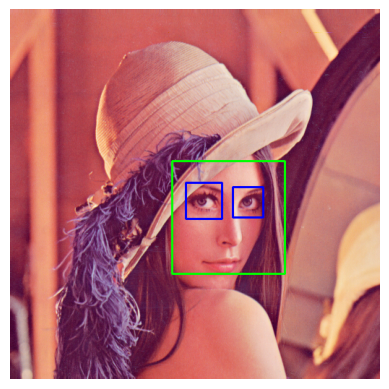

In [9]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

#caminho onde estão os pesos
path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"

# Inicializa o classificador cascade
face = cv2.CascadeClassifier(path)
olho = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
print("Os pesos estão no diretorio: ", path)

img = cv2.imread('lab_images/lena.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# O método detectMultiScale() realiza o processo de varredura que vimos no gif acima e retorna uma lista com as faces encontrardas.

faces_return = face.detectMultiScale(img_gray, scaleFactor = 1.2, minNeighbors = 5)
# olho_return = olho.detectMultiScale(img_gray, scaleFactor = 1.2, minNeighbors = 5)


for (x, y, w, h) in faces_return:
    # Desenha um retângulo ao redor da face detectada
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    # Define a região de interesse (ROI) para os olhos dentro da face detectada
    roi_gray = img_gray[y:y + h, x:x + w]
    roi_color = img[y:y + h, x:x + w]
# Detecta os olhos na região de interesse
    olhos = olho.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=10)
    for (ex, ey, ew, eh) in olhos:
        # Desenha um retângulo ao redor de cada olho detectado
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (255, 0, 0), 2)
    
    

# for (x, y, w, h) in olho_return:
#     # Desenha um retângulo ao redor do olho detectado
#     cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Exibe a imagem com as faces detectadas
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Desativa os eixos
plt.show()

    









## Desafio 3

Vamos aproveitar que temos as coodenadas da face e vamos lembrar como faz um crop (recorte ) desta imagem.

In [ ]:
    # Implemente sua solução aqui.....





## Desafio 4

`Faça a deteção dos olhos` da Lena, carrege os pesos que correspodem a detecção de olhos e implemente sua solução.

Escolha um modelo haarcascade coerente para realizar essa tarefa.

<img src="https://github.com/arnaldojr/cognitivecomputing/blob/master/material/aulas/PDI/lab14/haarcascade-tipos.png?raw=1">


Dica: Os olhos fazem parte da face, nesse sentido, não é necessário fazer a varredura em toda a imagem, basta fazer a varredura dentro dos limites onde está contida a face, concorda???

<img src="https://github.com/arnaldojr/cognitivecomputing/blob/master/material/aulas/PDI/lab14/lena-eye-face.png?raw=1">



In [ ]:
# implemente aqui sua sulução.............












## Desafio 5

No inicio da aula falamos que o método de Viola-Jones foi desruptivo por que tornou capaz a detecção de faces em tempo real.
Implemente um código .py que realiza a deteção em tempo real, capturando a imagem da sua webcam.


